In [ ]:
import pandas as pd
data = pd.read_csv("train.csv")

In [ ]:
data.shape

(1306122, 3)

In [ ]:
import nltk
import spacy
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#Text Pre-Processing

In [ ]:
#Step 1: Punctutation Removal
import string
string.punctuation

def removing_punctuation(text):
    ptfree="".join([i for i in text if i not in string.punctuation])
    return ptfree
#storing the puntuation free text
data['cleaned_ques']= data['question_text'].apply(lambda x:removing_punctuation(x))
data.head()

,qid,question_text,target,cleaned_ques
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,How did Quebec nationalists see their province...
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,Do you have an adopted dog how would you encou...
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,Why does velocity affect time Does velocity af...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,How did Otto von Guericke used the Magdeburg h...
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,Can I convert montra helicon D to a mountain b...


In [ ]:
data["question_text"][0]

'How did Quebec nationalists see their province as a nation in the 1960s?'

In [ ]:
data["cleaned_ques"][0]

'How did Quebec nationalists see their province as a nation in the 1960s'

In [ ]:
#Step 2: Lowering the text

data['ques_lower']= data['cleaned_ques'].apply(lambda x: x.lower())

In [ ]:
data["question_text"][0]

'How did Quebec nationalists see their province as a nation in the 1960s?'

In [ ]:
data["ques_lower"][0]

'how did quebec nationalists see their province as a nation in the 1960s'

In [ ]:
#Step 3: Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenization(text):
    tokens = word_tokenize(text)
    return tokens
#applying function to the column
data['ques_tokenized']= data['ques_lower'].apply(lambda x: tokenization(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data['ques_tokenized'][0]

['how',
 'did',
 'quebec',
 'nationalists',
 'see',
 'their',
 'province',
 'as',
 'a',
 'nation',
 'in',
 'the',
 '1960s']

In [ ]:
#Step 4 : Stop Words Removal
import nltk
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
stopwords[0:5]

['i', 'me', 'my', 'myself', 'we']

In [ ]:
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [ ]:
data['no_stopwords']= data['ques_tokenized'].apply(lambda x:remove_stopwords(x))

In [ ]:
data['no_stopwords'][0]

['quebec', 'nationalists', 'see', 'province', 'nation', '1960s']

In [ ]:
#Step 5: Lemmatization
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  lemm_text=" ".join(lemm_text)
  return lemm_text

data['ques_lemmatized']=data['no_stopwords'].apply(lambda x:lemmatizer(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data['no_stopwords'][0]

['quebec', 'nationalists', 'see', 'province', 'nation', '1960s']

In [ ]:
data['ques_lemmatized'][0]

'quebec nationalist see province nation 1960s'

In [ ]:
preprocessed_data= data[['qid','question_text','ques_lemmatized','target']]

In [ ]:
preprocessed_data.head()

,qid,question_text,ques_lemmatized,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,quebec nationalist see province nation 1960s,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",adopted dog would encourage people adopt shop,0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,velocity affect time velocity affect space geo...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,otto von guericke used magdeburg hemisphere,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,convert montra helicon mountain bike changing ...,0


In [ ]:
preprocessed_data.to_csv('quora_preprocessed.csv',index=False)

#EDA - Graphs

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

**Bar Graph - Target Distribution:**

This graph represents the distribution of target values (sincere vs. insincere questions) in the dataset. The x-axis represents the target values (0 for sincere, 1 for insincere), and the y-axis represents the count of each target value. It shows the balance or imbalance between the two classes.

Inference:

* If the graph shows a balanced distribution, it indicates that the dataset has a
relatively equal number of sincere and insincere questions.
* If the graph shows an imbalanced distribution, it suggests that there might be a class imbalance, with one class (either sincere or insincere) dominating the dataset.

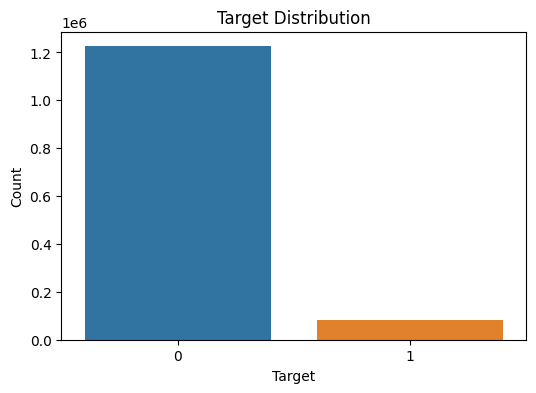

In [ ]:
# Bar Graph - Target Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Distribution')
plt.show()

**Bar Graph - Word Frequency:**

This graph displays the frequency of the top N words in the dataset. It shows the count of each word on the y-axis, with the corresponding word labels on the x-axis.

Inference:

* The bar graph allows us to identify the most common words in the dataset.
* By comparing the word frequency between sincere and insincere questions, we can observe any significant differences in word usage that might be associated with insincerity.

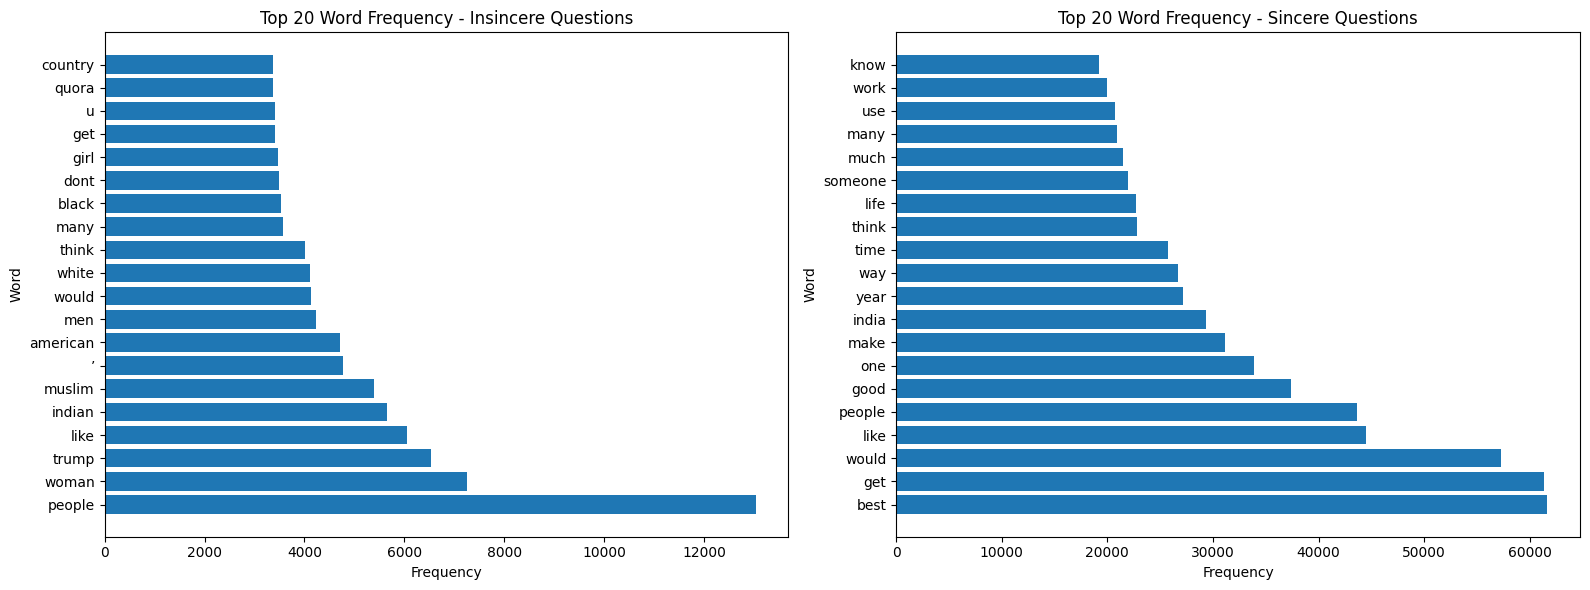

In [ ]:
from collections import Counter

top_n = 20  # Number of top words to display

# Filter data for insincere questions
insincere_data = data[data['target'] == 1]

# Combine non-null lemmatized insincere questions into a single string
combined_insincere_text = ' '.join(insincere_data['ques_lemmatized'].dropna())

# Count word frequencies for insincere questions
insincere_word_frequency = Counter(combined_insincere_text.split()).most_common(top_n)
insincere_word_frequency = dict(insincere_word_frequency)

# Filter data for sincere questions
sincere_data = data[data['target'] == 0]

# Combine non-null lemmatized sincere questions into a single string
combined_sincere_text = ' '.join(sincere_data['ques_lemmatized'].dropna())

# Count word frequencies for sincere questions
sincere_word_frequency = Counter(combined_sincere_text.split()).most_common(top_n)
sincere_word_frequency = dict(sincere_word_frequency)

# Plot bar graphs
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar graph for insincere questions
axes[0].barh(list(insincere_word_frequency.keys()), list(insincere_word_frequency.values()))
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Word')
axes[0].set_title(f'Top {top_n} Word Frequency - Insincere Questions')

# Bar graph for sincere questions
axes[1].barh(list(sincere_word_frequency.keys()), list(sincere_word_frequency.values()))
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Word')
axes[1].set_title(f'Top {top_n} Word Frequency - Sincere Questions')

plt.tight_layout()
plt.show()

(same thing can be done in the form of wordcloud as below)

**Word Cloud - Most Frequent Words:**

The word cloud visually represents the most frequent words in the dataset. The size of each word in the cloud corresponds to its frequency.

Inference:

The word cloud helps identify the common topics or themes present in both sincere and insincere questions.
It can reveal frequently used words or phrases that might be indicative of insincerity or certain patterns in the dataset.

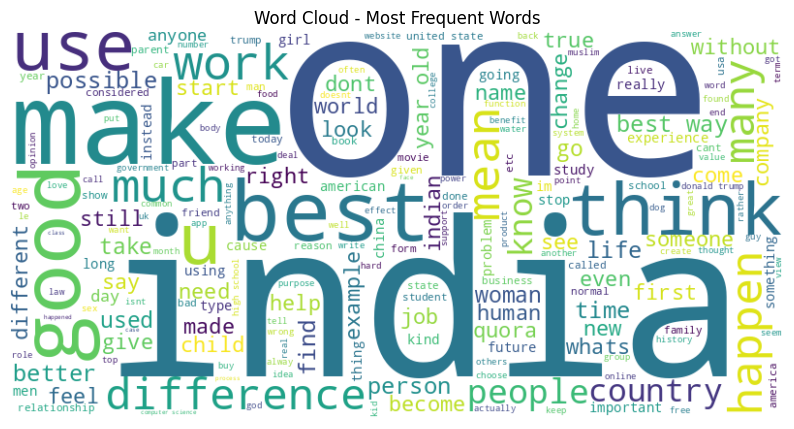

In [ ]:
from wordcloud import WordCloud

# Combine all the lemmatized questions into a single string
text = ' '.join(data['ques_lemmatized'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Frequent Words')
plt.show()

**Histogram - Question Length:**

The histogram visualizes the distribution of question lengths in terms of the number of words or characters. It shows the count of questions falling into different length ranges on the x-axis, with the count on the y-axis.

Inference:

* The histogram helps understand the typical length of questions in the dataset and identifies any outliers or patterns in question length.
* It provides insights into whether insincere questions tend to be longer or shorter compared to sincere questions.

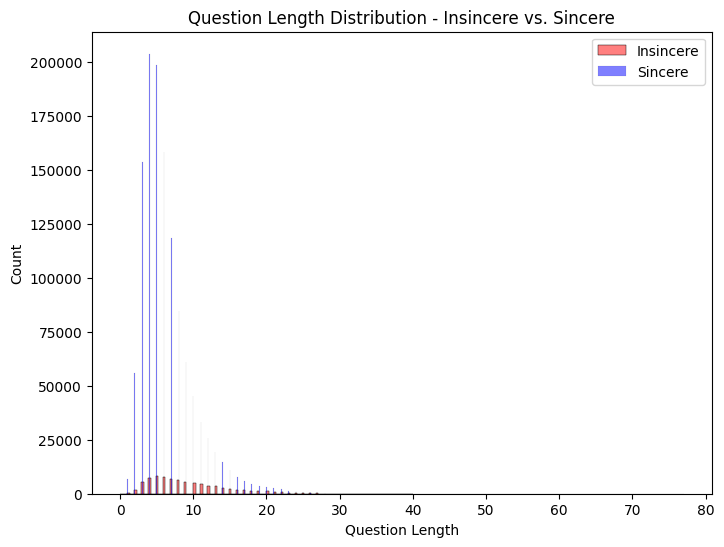

In [ ]:
import numpy as np

# Filter data for insincere questions
insincere_data = data[data['target'] == 1]

# Remove missing values from 'ques_lemmatized' column
insincere_data = insincere_data.dropna(subset=['ques_lemmatized'])

# Calculate question lengths for insincere questions
insincere_question_lengths = insincere_data['ques_lemmatized'].str.split().apply(lambda x: len(x))

# Filter data for sincere questions
sincere_data = data[data['target'] == 0]

# Remove missing values from 'ques_lemmatized' column
sincere_data = sincere_data.dropna(subset=['ques_lemmatized'])

# Calculate question lengths for sincere questions
sincere_question_lengths = sincere_data['ques_lemmatized'].str.split().apply(lambda x: len(x))

# Plot histograms
plt.figure(figsize=(8, 6))
sns.histplot(insincere_question_lengths, color='red', alpha=0.5, label='Insincere')
sns.histplot(sincere_question_lengths, color='blue', alpha=0.5, label='Sincere')
plt.xlabel('Question Length')
plt.ylabel('Count')
plt.title('Question Length Distribution - Insincere vs. Sincere')
plt.legend()
plt.show()

#BERT

In [ ]:
!pip install transformers --quiet
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
data = pd.read_csv('quora_preprocessed.csv')

In [ ]:
import tqdm
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
from collections import defaultdict
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [ ]:
pretrained_model_name = 'bert-base-cased'
maxlen = 160
batch_size = 16
epochs = 1
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
tokenizer = BertTokenizer.from_pretrained(pretrained_model_name)

# Bert Tokenizer with example
example_text = 'I am doing the final module of NLP Interestship '

tokens = tokenizer.tokenize(example_text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(f' Sentence: {example_text}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: I am doing the final module of NLP Interestship 
   Tokens: ['I', 'am', 'doing', 'the', 'final', 'module', 'of', 'NL', '##P', 'Interest', '##ship']
Token IDs: [146, 1821, 1833, 1103, 1509, 13196, 1104, 21239, 2101, 17067, 6607]


In [ ]:
data['processed_text'] = data['ques_lemmatized'].astype('str')

In [ ]:
token_lens = []
for txt in data.processed_text:
    tokens = tokenizer.encode(txt, max_length=512, truncation = True)
    token_lens.append(len(tokens))

In [ ]:
class QuestionDataset(Dataset):

    def __init__(self, questions, targets, tokenizer, max_len):
        self.questions = questions
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
    def __len__(self):
        return len(self.questions)
    def __getitem__(self, item):
        question = str(self.questions[item])
        target = self.targets[item]
        encoding = self.tokenizer.encode_plus(
          question,
          add_special_tokens=True,
          max_length=self.max_len,
          return_token_type_ids=False,
          pad_to_max_length=True,
          return_attention_mask=True,
          return_tensors='pt',
          truncation=True
        )
        return {
          'question_text': question,
          'input_ids': encoding['input_ids'].flatten(),
          'attention_mask': encoding['attention_mask'].flatten(),
          'targets': torch.tensor(target, dtype=torch.long)
      }

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data,test_size = 0.4,random_state = 42)
val_data, test_data = train_test_split(test_data,test_size = 0.6,random_state = 42)

In [ ]:
def data_loader(data, tokenizer, max_len, batch_size):
    ds = QuestionDataset(
      questions = data.processed_text.to_numpy(),
      targets = data.target.to_numpy(),
      tokenizer = tokenizer,
      max_len = max_len
    )
    return DataLoader(
      ds,
      batch_size = batch_size,
      num_workers = 0
    )

In [ ]:
train_data_loader = data_loader(train_data, tokenizer, maxlen, batch_size)
val_data_loader = data_loader(val_data, tokenizer, maxlen, batch_size)
test_data_loader = data_loader(test_data, tokenizer, maxlen, batch_size)

data = next(iter(train_data_loader))
data.keys()

print (len(train_data_loader))
print (len(val_data_loader))
print (len(test_data_loader))

48980
13062
19592


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Shape of the torch
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([16, 160])
torch.Size([16, 160])
torch.Size([16])


In [ ]:
data

{'question_text': ['anyone ketorolac pain affective would say long',
  'troubleshoot laptop unable connect tv via hdmi',
  'wrong put child romantic relationship people think ’ okay prioritize relationship child',
  'teenager intelligent',
  'creative way fundraise',
  'solar system form',
  'happens black hole black hole collide',
  'depleted uranium slug',
  'nirav modi moving around without legal passport',
  'favorite historical cultural documentary',
  'life korean war south korean',
  'ever get urge kill someone something usually trigger',
  'stable hyundai i20 highway',
  'hispanic origin mean',
  'president lawyer better worse leading country president background',
  'unit speed velocity acceleration'],
 'input_ids': tensor([[  101,  2256,   180,  ...,     0,     0,     0],
         [  101, 16115, 27240,  ...,     0,     0,     0],
         [  101,  2488,  1508,  ...,     0,     0,     0],
         ...,
         [  101,  1117, 10224,  ...,     0,     0,     0],
         [  101,

BERT MODEL

In [ ]:
class QuestionClassifier(nn.Module):
    def __init__(self, n_classes):
        super(QuestionClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(pretrained_model_name)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(
          input_ids=input_ids,
          attention_mask=attention_mask,
          return_dict=False,
        )
        output = self.drop(pooled_output)
        return self.out(output)

In [ ]:
model = QuestionClassifier(2)
model = model.to(device)

In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([16, 160])
torch.Size([16, 160])


In [ ]:
model

QuestionClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwis

In [ ]:
model(input_ids, attention_mask)

tensor([[ 0.1672, -0.1515],
        [-0.0406,  0.0823],
        [ 0.3394, -0.2917],
        [-0.3240,  0.1145],
        [-0.0535, -0.3067],
        [ 0.1848, -0.0471],
        [ 0.1881,  0.2533],
        [ 0.4266, -0.1011],
        [ 0.1666, -0.1679],
        [ 0.0348,  0.1790],
        [-0.3116,  0.1667],
        [ 0.1721, -0.1126],
        [ 0.2483, -0.0233],
        [-0.2967, -0.1983],
        [ 0.1493,  0.1787],
        [ 0.1202, -0.5690]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * epochs
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)
loss_fn = nn.CrossEntropyLoss().to(device)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training Function

In [ ]:
def training_func(
    model,
    data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    n_examples
):
    # Putting the model in the training mode
    model = model.train()

    losses = []
    correct_predictions = 0
    for dl in data_loader:
        input_ids = dl["input_ids"].to(device)
        attention_mask = dl["attention_mask"].to(device)
        targets = dl["targets"].to(device)
        outputs = model(
          input_ids=input_ids,
          attention_mask=attention_mask
        )
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

Evaluation Function

In [ ]:
def evaluate_model(model, data_loader, loss_fn, device, n_examples):

    # Putting the model in the Evaluation mode
    model = model.eval()

    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for dl in data_loader:
            input_ids = dl["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)
            outputs = model(
              input_ids=input_ids,
              attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)
            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)

Train and Evaluate

In [ ]:
history = defaultdict(list)
best_accuracy = 0
for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')
    print('-' * 30)
    train_acc, train_loss = training_func(
      model,
      train_data_loader,
      loss_fn,
      optimizer,
      device,
      scheduler,
      len(train_data)
    )
    print(f'Train loss {train_loss} accuracy {train_acc}')
    val_acc, val_loss = evaluate_model(
      model,
      val_data_loader,
      loss_fn,
      device,
      len(val_data)
    )
    print(f'Val   loss {val_loss} accuracy {val_acc}')
    print()
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc

Epoch 1/1
------------------------------


Predictions

In [ ]:
def predictions(model, data_loader):
    model = model.eval()
    question_texts = []
    predictions = []
    prediction_probs = []
    real_values = []
    with torch.no_grad():
        for dl in data_loader:
            texts = dl["question_text"]
            input_ids = dl["input_ids"].to(device)
            attention_mask = dl["attention_mask"].to(device)
            targets = dl["targets"].to(device)
            outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)
            question_texts.extend(texts)
            predictions.extend(preds)
            prediction_probs.extend(outputs)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()
    return question_texts, predictions, prediction_probs, real_values

Getting Predictions

In [ ]:
i = 0
for text, pred, prob in zip(y_question_texts, y_pred, y_pred_probs):
    print(text, end = "   ")
    print(pred, end = "   ")
    print(prob)
    i+=1
    if i == 5:
        break

Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

F1 Score

In [ ]:
# f1_score
print(f1_score(y_test, y_pred))